In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [2]:
from text_recognizer.datasets import EmnistDataset, EmnistLinesDataset, Transpose, construct_image_from_string, get_samples_by_character

In [3]:
emnist_lines = EmnistLinesDataset(train=False)

In [4]:
emnist_lines.load_or_generate_data()

2020-09-10 20:11:30.358 | DEBUG    | text_recognizer.datasets.emnist_lines_dataset:_load_data:134 - EmnistLinesDataset loading data from HDF5...


In [5]:
def convert_y_label_to_string(y, emnist_lines=emnist_lines):
    return ''.join([emnist_lines.mapper(i) for i in y])

office in Arkansas after the______
in________________________________
by a oneshot technique____________
office Incumbent__________________
of the revolutionary______________
they______________________________
the scene but_____________________
Knox Ky___________________________
workers wife refused to have______


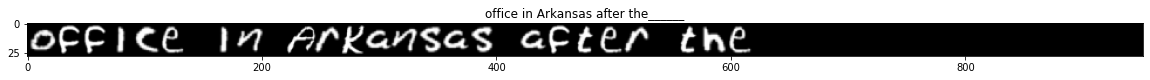

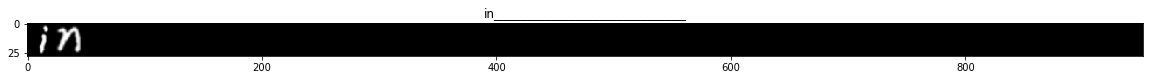

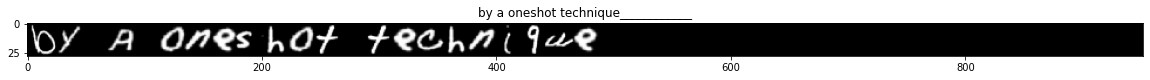

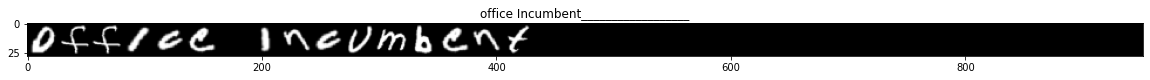

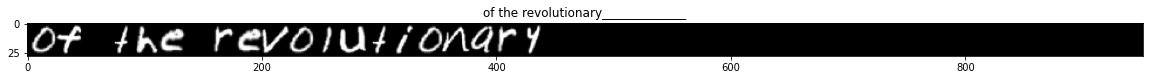

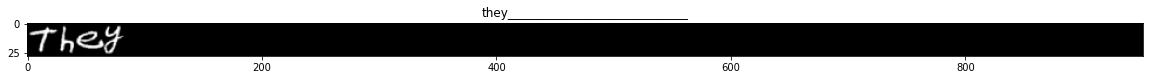

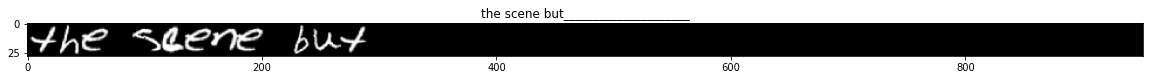

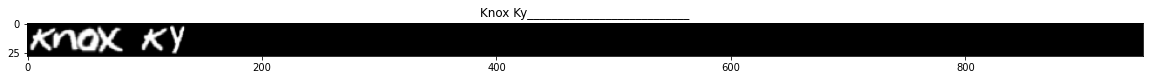

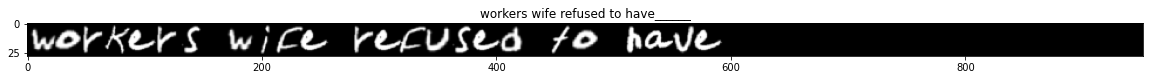

In [6]:


num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20, 20))
    data, target = emnist_lines[i]
    sentence = convert_y_label_to_string(target.numpy()) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(data.squeeze(0), cmap='gray')


In [7]:
print(emnist_lines)

EMNIST Lines Dataset
Max length: 34
Min overlap: 0
Max overlap: 0.33
Num classes: 80
Input shape: (28, 952)
Data: (10000, 28, 952)
Tagets: (10000, 34)



In [8]:
target

tensor([58, 50, 53, 46, 40, 53, 54, 62, 58, 44, 41, 40, 62, 53, 40, 41, 56, 54,
        40, 39, 62, 55, 50, 62, 43, 36, 57, 40, 79, 79, 79, 79, 79, 79],
       dtype=torch.uint8)

In [9]:
from text_recognizer.networks import LineRecurrentNetwork

In [10]:
crnn = LineRecurrentNetwork(encoder="ResidualNetworkEncoder",
                            
          encoder_args={
            "in_channels": 1,
            "num_classes": 80,
            "depths": [2, 2],
            "block_sizes": [64, 128],
            "activation": "leaky_relu",
            "stn": False,})

In [11]:
output = crnn(data)

In [12]:
targets = target.unsqueeze(0).type(torch.long)

In [13]:
input_lengths = torch.full(
    size=(output.shape[1],), fill_value=output.shape[0], dtype=torch.long,
)
target_lengths = torch.full(
    size=(output.shape[1],), fill_value=targets.shape[1], dtype=torch.long,
)

In [15]:
ctc = torch.nn.CTCLoss(blank=79)

In [16]:
ctc(output, targets, input_lengths, target_lengths)

tensor(6.9917, grad_fn=<MeanBackward0>)